### Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from kneed import KneeLocator
random_seed = 211086

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Import the original dataset

In [2]:
food_products = pd.read_csv(r'C:\Users\Stefanos\Downloads\archive\Food_Production.csv', index_col = 'Food product') # Using 'Food Products' as the index column
food_products

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,3.48,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875


### Rename columns for visual purposes

In [3]:
food_products.rename(columns={"Packging":"Packaging"
                              ,"Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)":"Eutrophying emissions per 1000kcal"
                              ,"Eutrophying emissions per kilogram (gPO₄eq per kilogram)":"Eutrophying emissions per kilogram"
                              ,"Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)":"Eutrophying emissions per 100g protein"
                              ,"Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)":"Greenhouse gas emissions per 1000kcal"
                              ,"Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)":"Greenhouse gas emissions per 100g protein"
                              ,"Land use per kilogram (m² per kilogram)":"Land use per kilogram"
                              ,"Land use per 100g protein (m² per 100g protein)":"Land use per 100g protein"
                              ,"Land use per 1000kcal (m² per 1000kcal)":"Land use per 1000kcal"
                              ,"Scarcity-weighted water use per kilogram (liters per kilogram)":"Scarcity-weighted water use per kilogram"
                              ,"Scarcity-weighted water use per 100g protein (liters per 100g protein)":"Scarcity-weighted water use per 100g protein"
                              ,"Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)":"Scarcity-weighted water use per 1000kcal"
                             ,"Freshwater withdrawals per 100g protein (liters per 100g protein)":"Freshwater withdrawals per 100g protein"
                             ,"Freshwater withdrawals per kilogram (liters per kilogram)":"Freshwater withdrawals per kilogram"
                             ,"Freshwater withdrawals per 1000kcal (liters per 1000kcal)":"Freshwater withdrawals per 1000kcal"}, inplace=True)

### Checking for NaN values

In [4]:
food_products.isna().sum()

Land use change                                  0
Animal Feed                                      0
Farm                                             0
Processing                                       0
Transport                                        0
Packaging                                        0
Retail                                           0
Total_emissions                                  0
Eutrophying emissions per 1000kcal              10
Eutrophying emissions per kilogram               5
Eutrophying emissions per 100g protein          16
Freshwater withdrawals per 1000kcal             13
Freshwater withdrawals per 100g protein         17
Freshwater withdrawals per kilogram              5
Greenhouse gas emissions per 1000kcal           10
Greenhouse gas emissions per 100g protein       16
Land use per 1000kcal                           10
Land use per kilogram                            5
Land use per 100g protein                       16
Scarcity-weighted water use per

### As we can see many columns contain NaN values, and these must be handled carefully.

### We create a boxplot to check the data spread

C:\Users\Stefanos\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


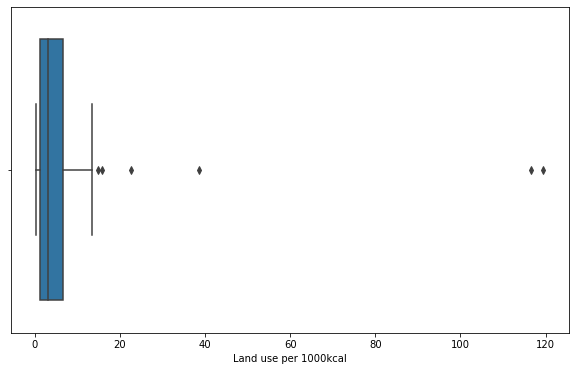

In [5]:
# Box plot of Land use per 1000kcal as an example

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(food_products['Land use per 1000kcal']);

### We observe that our data is skewed due to the presence of outliers. Therefore, the NaN values will be replaced with the median instead of the mean.

In [6]:
food_products = food_products.fillna(food_products.median())

### Check how the data looks 

In [7]:
food_products

,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,...,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,11.46,...,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,11.46,...,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,11.46,...,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,...,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480
Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,3.48,...,347.647059,59.1,0.628415,2.705882,1.202186,0.880,5.176471,2754.20,16201.176470,3762.568306
Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,...,1083.327272,0.0,1.355236,14.666667,1.858316,1.810,20.111111,0.00,20917.213595,12605.256790
Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,...,1083.327272,620.1,0.911681,6.500000,0.581197,2.040,7.936314,16438.60,20917.213595,4683.361823
Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,...,1083.327272,217.7,0.515670,6.500000,0.521368,1.830,7.936314,9493.30,20917.213595,2704.643875


### Create a correlation matrix to check the correlation between our features.

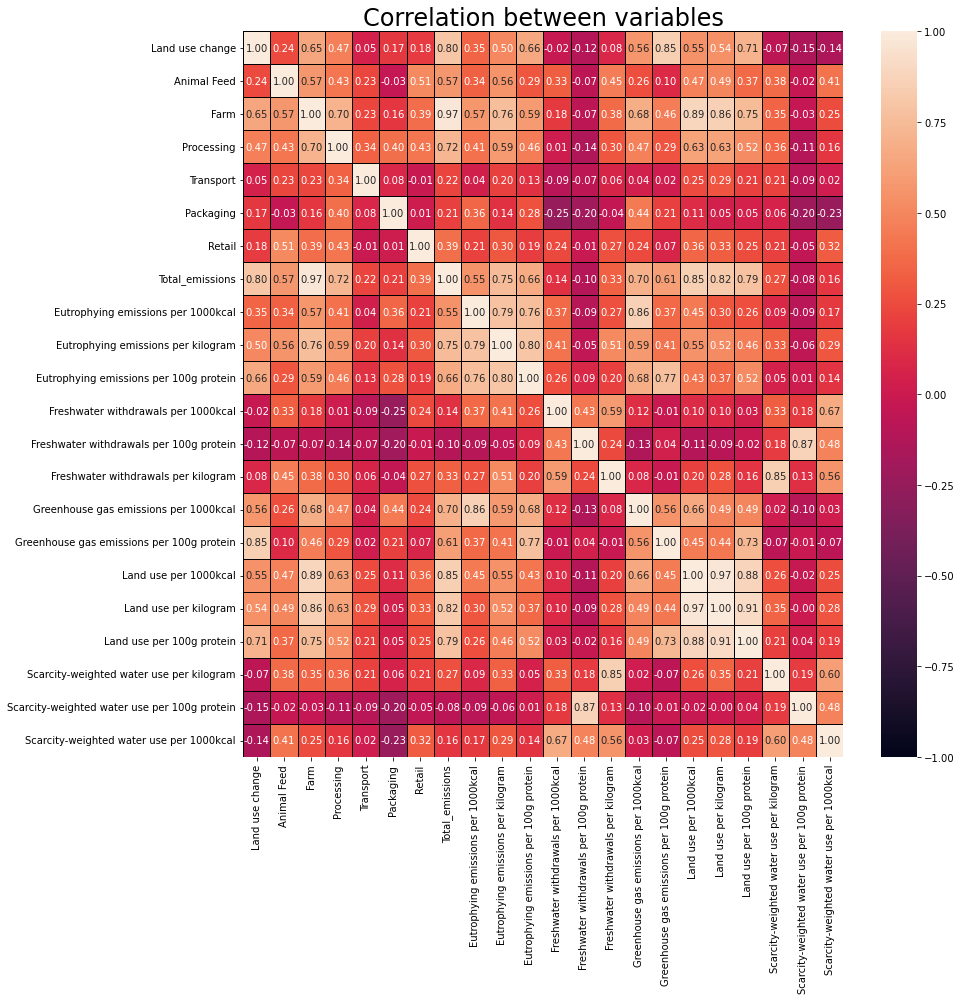

In [8]:
plt.figure(figsize=(14,14))
heatmap = sns.heatmap(food_products.corr(), vmin=-1, vmax=1, annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
heatmap.set_title('Correlation between variables', fontdict={'fontsize': 24})
#plt.show()
plt.tight_layout()
plt.savefig('correlation_matrix.jpg')

The main observation from the correlation analysis is that the Total emissions value is highly correlated with Land use (0.90), Farming (0.97) and less correlated with Transport (0.22) and Packaging (0.21). Given that Total emissions is a sum of the first seven factors, this correlation shows these factors separate contributions to the Total emission value. The result intuitively matches the concept of fixed and variable costs. The counter-intuitive finding is that for animal-based food products Farming emissions have a larger effect on Total emissions than Animal Feed.

### We will now perform cluster analysis to check if we can group our data into high impact and low impact environmental food products.

### The first 8 columns of the dataset are dropped for these reasons:
1. The Animal Feed feature can affect the clustering results because it is specific for the animal based foods.  
2. Total emissions column is calculated based on the Animal Feed column  
3. These features are not sufficiently described with regards to their units of measurement, and also are rather  
vague and hard to interpret.

In [9]:
food_products.drop(["Animal Feed", "Total_emissions","Land use change","Farm","Processing","Transport","Packaging","Retail"], axis=1, inplace=True)

In [10]:
food_products

,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,Eutrophying emissions per 100g protein,Freshwater withdrawals per 1000kcal,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal
Food product,,,,,,,,,,,,,,
Wheat & Rye (Bread),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Maize (Meal),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Barley (Beer),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
Oatmeal,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461
Rice,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480
Potatoes,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.880,5.176471,2754.20,16201.176470,3762.568306
Cassava,0.708419,0.69,7.666667,338.059413,1083.327272,0.0,1.355236,14.666667,1.858316,1.810,20.111111,0.00,20917.213595,12605.256790
Cane Sugar,4.820513,16.92,37.333333,176.666667,1083.327272,620.1,0.911681,6.500000,0.581197,2.040,7.936314,16438.60,20917.213595,4683.361823
Beet Sugar,1.541311,5.41,37.333333,62.022792,1083.327272,217.7,0.515670,6.500000,0.521368,1.830,7.936314,9493.30,20917.213595,2704.643875


### Before clustering we need to scale the data. We use the StandardScaler algorithm of the sklearn library 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
food_products_scaled = scaler.fit_transform(food_products)

### Perform Principal Component Analysis (PCA)

We perform Principal Component Analysis (PCA) for dimensionality reduction to explain 95% of the total variance. This will make the clustering perform better as it can handle any correlation issues, provide less features, and help us visualize the clusters more clearly.  

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(food_products_scaled)
food_products_after_pca = pca.transform(food_products_scaled)
food_products_after_pca

array([[-1.08052905e+00, -3.64328707e-01, -8.21088348e-03,
        -9.00590476e-02, -3.90023100e-02, -1.72751052e-01,
         7.39906523e-02],
       [-1.08052905e+00, -3.64328707e-01, -8.21088348e-03,
        -9.00590476e-02, -3.90023100e-02, -1.72751052e-01,
         7.39906523e-02],
       [-1.08052905e+00, -3.64328707e-01, -8.21088348e-03,
        -9.00590476e-02, -3.90023100e-02, -1.72751052e-01,
         7.39906523e-02],
       [-1.57763146e+00, -7.41138614e-01,  1.17169541e-01,
        -7.93561127e-01, -1.79818475e-01,  1.73024979e-01,
         8.32440387e-02],
       [-3.22482279e-01,  1.64717859e+00, -1.84005254e-01,
         4.96736712e-01,  6.42393953e-01,  2.10142502e-01,
        -1.78569705e-01],
       [-1.77949817e+00, -1.18132650e+00,  9.19001494e-02,
        -4.25164111e-01, -1.38836451e-01,  2.03733586e-01,
         2.28050906e-01],
       [-1.33497295e+00, -6.36137632e-01,  4.37880571e-01,
         1.16250656e-01, -9.06981342e-02, -5.00791401e-01,
        -2.3845153

## K-Means Clustering

### Create an elbow plot to check the optimal number of clusters

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(food_products_after_pca)
    distortions.append(kmeanModel.inertia_)

C:\Users\Stefanos\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


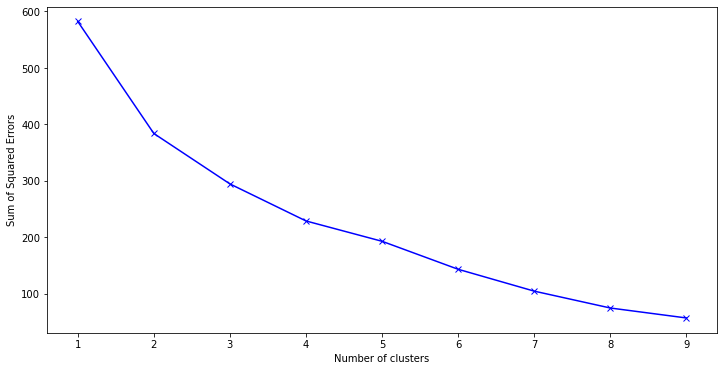

In [14]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
kn = KneeLocator(K, distortions, direction='decreasing')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
#plt.title('Elbow Plot', fontsize=16)
plt.show()

### The elbow method implies that k=2 is the optimal number of clusters. We use k-means for clustering.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(food_products_after_pca)

KMeans(n_clusters=2)

### Create a column for the clusters as generated from the k-means algorithm

In [16]:
food_products['Clusters'] = kmeans.labels_.tolist()

In [17]:
food_products

,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,Eutrophying emissions per 100g protein,Freshwater withdrawals per 1000kcal,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal,Clusters
Food product,,,,,,,,,,,,,,,
Wheat & Rye (Bread),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Maize (Meal),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Barley (Beer),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Oatmeal,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,0
Rice,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,0
Potatoes,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.880,5.176471,2754.20,16201.176470,3762.568306,0
Cassava,0.708419,0.69,7.666667,338.059413,1083.327272,0.0,1.355236,14.666667,1.858316,1.810,20.111111,0.00,20917.213595,12605.256790,0
Cane Sugar,4.820513,16.92,37.333333,176.666667,1083.327272,620.1,0.911681,6.500000,0.581197,2.040,7.936314,16438.60,20917.213595,4683.361823,0
Beet Sugar,1.541311,5.41,37.333333,62.022792,1083.327272,217.7,0.515670,6.500000,0.521368,1.830,7.936314,9493.30,20917.213595,2704.643875,0


### Checking the average values by cluster

In [18]:
food_products.groupby(food_products["Clusters"]).mean()

,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,Eutrophying emissions per 100g protein,Freshwater withdrawals per 1000kcal,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal
Clusters,,,,,,,,,,,,,,
0,8.921311,14.326389,32.707344,382.348478,1320.260156,602.588889,1.791989,6.578026,3.011367,6.120417,9.280868,26156.829167,45537.412542,14244.230171
1,92.260552,184.988571,120.673099,822.270923,1182.079489,2261.614286,19.274577,33.194789,47.331098,132.291429,82.672271,74585.957143,36479.025813,24641.902051


### Check how the clusters look like

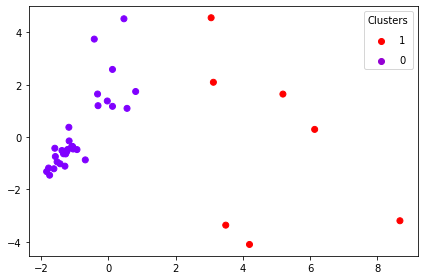

In [22]:
plt.scatter(food_products_after_pca[:,0],food_products_after_pca[:,1], c=kmeans.labels_, cmap='rainbow');
plt.tight_layout()
plt.scatter([], [], c='r', label='1')
plt.scatter([], [], c='darkviolet', label='0')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Clusters');
plt.savefig('clusters.png')

### One cluster includes high impact, while the other cluster includes low impact food products as observed by the population mean 

### Checking each cluster individually

### First cluster

In [20]:
food_products.loc[food_products['Clusters'] == 0]

,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,Eutrophying emissions per 100g protein,Freshwater withdrawals per 1000kcal,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal,Clusters
Food product,,,,,,,,,,,,,,,
Wheat & Rye (Bread),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Maize (Meal),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Barley (Beer),7.000000,11.46,37.333333,338.059413,1083.327272,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,0
Oatmeal,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,0
Rice,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,0
Potatoes,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.880,5.176471,2754.20,16201.176470,3762.568306,0
Cassava,0.708419,0.69,7.666667,338.059413,1083.327272,0.0,1.355236,14.666667,1.858316,1.810,20.111111,0.00,20917.213595,12605.256790,0
Cane Sugar,4.820513,16.92,37.333333,176.666667,1083.327272,620.1,0.911681,6.500000,0.581197,2.040,7.936314,16438.60,20917.213595,4683.361823,0
Beet Sugar,1.541311,5.41,37.333333,62.022792,1083.327272,217.7,0.515670,6.500000,0.521368,1.830,7.936314,9493.30,20917.213595,2704.643875,0


### As we can see, the first cluster containing the high environmental impact foods, includes more than 71 % animal based foods.

### Now the second cluster

In [21]:
food_products.loc[food_products['Clusters'] == 1]

,Eutrophying emissions per 1000kcal,Eutrophying emissions per kilogram,Eutrophying emissions per 100g protein,Freshwater withdrawals per 1000kcal,Freshwater withdrawals per 100g protein,Freshwater withdrawals per kilogram,Greenhouse gas emissions per 1000kcal,Greenhouse gas emissions per 100g protein,Land use per 1000kcal,Land use per kilogram,Land use per 100g protein,Scarcity-weighted water use per kilogram,Scarcity-weighted water use per 100g protein,Scarcity-weighted water use per 1000kcal,Clusters
Food product,,,,,,,,,,,,,,,
Coffee,197.357143,110.52,138.150000,46.250000,32.375000,25.9,50.946429,35.662500,38.607143,21.62,27.025000,337.0,421.25000,601.785714,1
Dark Chocolate,16.843327,87.08,174.160000,104.564797,1081.200000,540.6,9.023211,93.300000,13.338491,68.96,137.920000,2879.2,5758.40000,556.905222,1
Beef (beef herd),110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.50552,12722.527470,1
Beef (dairy herd),133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.59068,43884.688640,1
Lamb & Mutton,30.640379,97.13,48.540730,568.706625,900.949525,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.03648,44771.293380,1
Cheese,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.421190,1
Fish (farmed),131.351955,235.12,103.100197,2062.178771,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.692740,1


### In contrast, the cluster containing the low environmental impact foods includes less than 14 % animal based foods. That means that 86% of the foods belong to the plant based category.

* The results of the clustering analysis show that the food product category having the highest environmental impact is 
that of the animal based foods. Specifically, more than 71 % of the food products included in the high impact cluster 
belong to that category. Beef, lamb & mutton, cheese, and fish are the animal based foods negatively contributing the 
most on the environment. 

* On the other hand, plant based foods dominate the low environmental impact cluster, with 86 % of the foods included from that category. The plant based foods that have the lowest environmental impact and should therefore be encouraged for consumption mainly include fruits, vegetables,oats, nuts, and vegetable oils.